<a href="https://colab.research.google.com/github/sancarg/Deep_Learning/blob/master/DL_Installing_Tensorflow___Keras_Syntext_Basics_fake_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Deep Learning<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
 pip install tensorflow

# Keras Syntax Basics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Deep_Learning/Deep_Learning_Notebooks/fake_reg.csv")

In [5]:
#df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


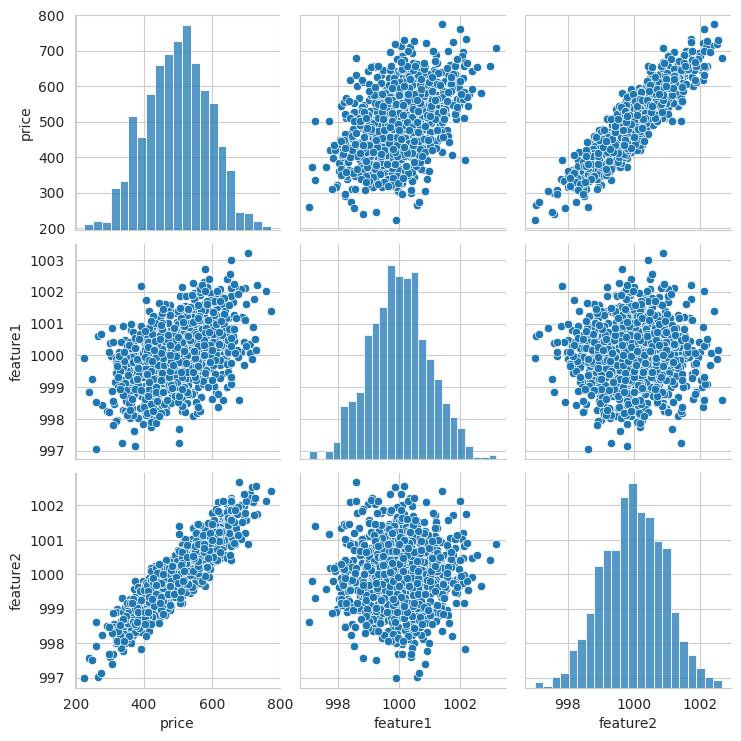

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values
# If didnt need scaling in this data we would use array format. But we will scale and in the scale process then it will be converted

In [13]:
X = df[['feature1', 'feature2']]
y = df['price']

In [14]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [15]:
y

,price
0,461.528
1,548.130
2,410.297
3,540.382
4,546.025
...,...
995,476.526
996,457.313
997,456.721
998,403.316


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
 |  scales them down into a fixed range, where the largest occurring data point
 |  corresponds to the maximum value and the smallest one 

In [21]:
scaler = MinMaxScaler()
# Scaling the features between 0-1 will get easier gradient descent

In [22]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

## Modelling

In [24]:
import tensorflow as tf

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [26]:
X_train.shape

(700, 2)

In [27]:
# First way to create model

# model = Sequential([Input(shape = (X_train.shape[1],)), # The Input layer needs to know the shape of the input data, which in this case should be (2,), representing 2 features.
#                     Dense(units = 4, activation = "relu"),
#                     Dense(units = 4, activation = "relu"),
#                     Dense(units = 4, activation = "relu"),
#                     Dense(units = 1)])
# unit means neuron

In [28]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))
# The activation code of the last layer is linear by default if not defined.
# If we want to run the model again we have to start from here.

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

 first line : features(2) * number of the neuron(4) + bias(4) = 12
 second line : number of the neuron(4) * number of the neuron(4) + bias(4) = 20

In [30]:
# Extract and display weights
weights = model.get_weights()

In [31]:
# Display the weights
for i, weight in enumerate(weights):
  print(f"Weight {i+1}: shape={weight.shape}")
  print(weight)

Weight 1: shape=(2, 4)
[[-0.15964603 -0.58629227 -0.15789962 -0.9053192 ]
 [ 0.6889026  -0.9496324  -0.8235018  -0.15861154]]
Weight 2: shape=(4,)
[0. 0. 0. 0.]
Weight 3: shape=(4, 4)
[[-0.03155851  0.19620246 -0.6965488   0.21612233]
 [ 0.7111556   0.7126195   0.03538948  0.8125147 ]
 [ 0.3957526   0.2857049  -0.52262354  0.06665766]
 [-0.5280807  -0.7678654  -0.04297602 -0.1363247 ]]
Weight 4: shape=(4,)
[0. 0. 0. 0.]
Weight 5: shape=(4, 4)
[[ 0.43925673  0.75163037  0.66034466  0.36117893]
 [-0.06844783 -0.60496736  0.24252957 -0.33163685]
 [ 0.8315665   0.5079691  -0.49015096  0.5408214 ]
 [ 0.20826381 -0.24577606 -0.70591545  0.0370667 ]]
Weight 6: shape=(4,)
[0. 0. 0. 0.]
Weight 7: shape=(4, 1)
[[-0.49380702]
 [-0.04837608]
 [ 0.49275422]
 [-0.3544553 ]]
Weight 8: shape=(1,)
[0.]


### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [32]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [33]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)
# 700/32 = 22 and + 1,  22 part contains 32 batch-size and one 28 remaning part.

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 261136.9844
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 262448.3438
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 259767.2812 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258035.6875 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254892.8438 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255002.8906 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255803.0625 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255264.4688 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260237.5938 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256676.4531 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257122.2188 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256834.0469 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 259647.7969 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2

In [34]:
weights = model.get_weights()

In [35]:
for i, weight in enumerate(weights):
  print(f"Weight {i+1}: shape={weight.shape}")
  print(weight)

Weight 1: shape=(2, 4)
[[ 3.090749   -0.58629227 -0.15789962 -0.9053192 ]
 [ 5.5766244  -0.9496324  -0.8235018  -0.15861154]]
Weight 2: shape=(4,)
[2.4933965 0.        0.        0.       ]
Weight 3: shape=(4, 4)
[[-0.03155851  3.9899673  -0.6965488   0.01558522]
 [ 0.7111556   0.7126195   0.03538948  0.8125147 ]
 [ 0.3957526   0.2857049  -0.52262354  0.06665766]
 [-0.5280807  -0.7678654  -0.04297602 -0.1363247 ]]
Weight 4: shape=(4,)
[ 0.          2.5446203   0.         -0.19212376]
Weight 5: shape=(4, 4)
[[ 0.43925673  0.75163037  0.66034466  0.36117893]
 [-0.07888472 -0.60496736  3.9042099  -0.33163685]
 [ 0.8315665   0.5079691  -0.49015096  0.5408214 ]
 [ 0.19858418 -0.24577606 -0.5470335   0.0370667 ]]
Weight 6: shape=(4,)
[-0.00912597  0.          2.521319    0.        ]
Weight 7: shape=(4, 1)
[[-0.48804298]
 [-0.04837608]
 [ 4.1278157 ]
 [-0.3544553 ]]
Weight 8: shape=(1,)
[2.4961424]


In [36]:
pd.DataFrame(model.history.history)

,loss
0,256704.250
1,256648.703
2,256600.156
3,256549.344
4,256495.703
...,...
245,664.287
246,652.671
247,640.563
248,630.145


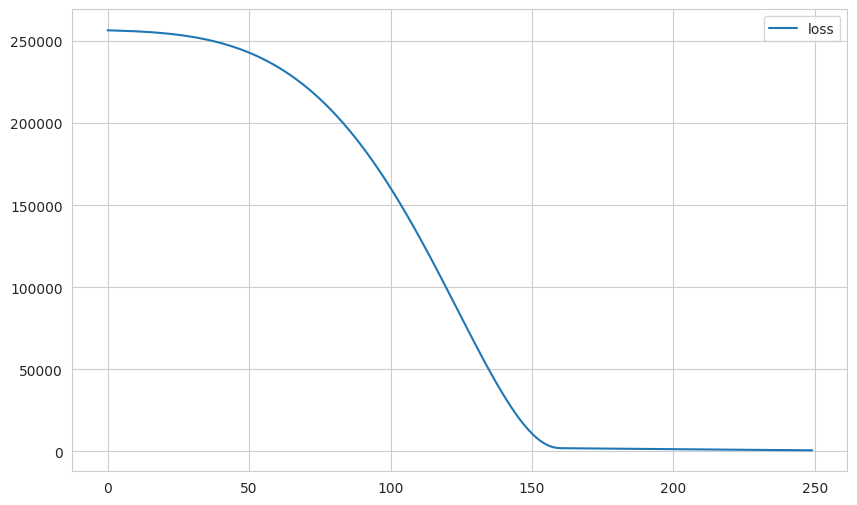

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

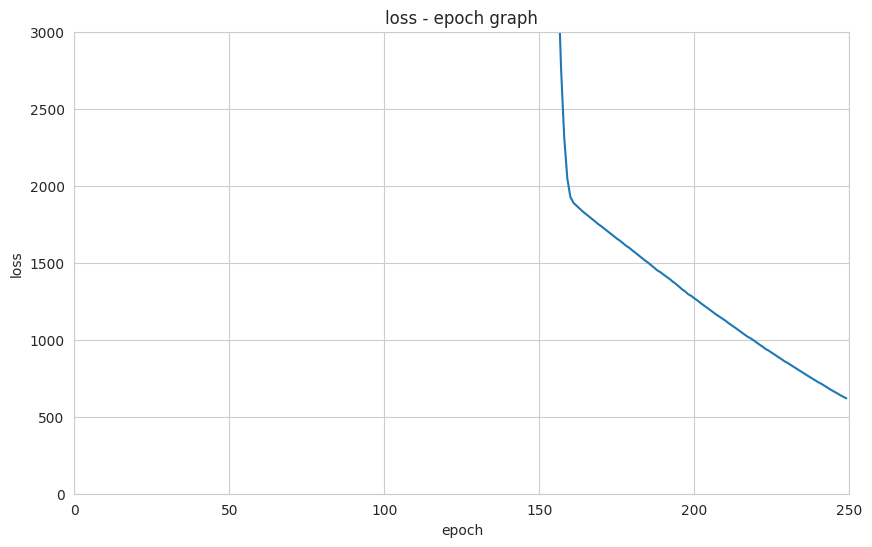

In [38]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values
plt.show()

## Model Performance

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
model.evaluate(X_train, y_train, verbose=0)
# mse

613.8724365234375

In [41]:
model.evaluate(X_test, y_test, verbose=0)

600.3441772460938

In [42]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(300, 1)

In [43]:
y_test.shape

(300,)

In [44]:
y_pred.reshape(-1,).shape

(300,)

In [45]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
941,380.477,408.278
292,453.458,468.233
346,439.497,461.310
559,618.934,592.521
716,610.092,575.924
826,511.893,512.692
797,618.123,590.874
158,377.570,401.698
30,482.556,493.823
439,316.951,369.254


<Axes: xlabel='Actual', ylabel='Pred'>

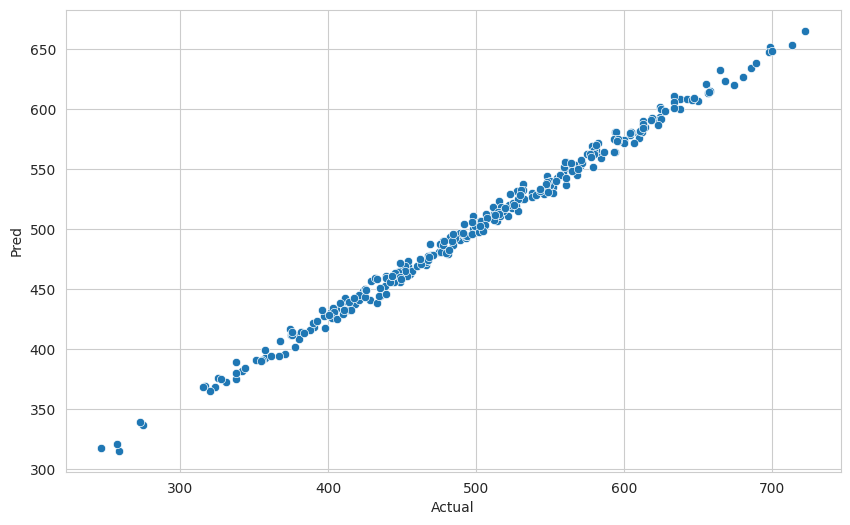

In [46]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [47]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [48]:
eval_metric(y_test, y_pred)

r2_score: 0.9317172375291406 
mae: 19.503639132937487 
mse: 600.3442098456493 
rmse: 24.501922574476666


## Final Model and Model Deployment

### Final Model Training

In [49]:
scaler = MinMaxScaler().fit(X)

In [50]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [51]:
X_scaled = scaler.transform(X)

In [52]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 253360.3125
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 258843.1562
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260706.1094
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254608.6719
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252243.7344
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258345.3281
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260441.2031
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254867.7656
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254105.0469
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254267.8906
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254082.0781
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251302.1562
Epoch 13/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255400.6719
Epoch 14/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250083.5625


In [53]:
final_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59 (240.00 B)

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [54]:
#final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [55]:
final_model.save("model_fake_reg.keras")

### Loading Model

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model_fake_reg = load_model('model_fake_reg.keras')

In [58]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [59]:
sample = [[998, 1000]]

In [60]:
sample_scaled = scaler_fake_reg.transform(sample)

In [61]:
sample_scaled

array([[0.15312457, 0.52980619]])

In [62]:
prediction = model_fake_reg.predict(sample_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


In [63]:
prediction[0][0]

420.5315

## Prediction-2

In [64]:
my_dict = {"feature1": [997, 998, 999, 1000, 1001],
           "feature2": [1000, 999, 998, 997, 996]}

In [65]:
sample = pd.DataFrame(my_dict)
sample

,feature1,feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [66]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [67]:
# Get the predictions as a NumPy array
predictions = model_fake_reg.predict(sample_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


In [68]:
# Convert the predictions to a Pandas Series
predictions_series = pd.Series(predictions.reshape(-1,), name='Predictions')

In [69]:
# Optionally, combine the predictions with the original sample data
sample_with_predictions = pd.concat([sample, predictions_series], axis=1)

In [70]:
print(sample_with_predictions)

   feature1  feature2  Predictions
0       997      1000      380.313
1       998       999      331.883
2       999       998      283.452
3      1000       997      235.022
4      1001       996      185.713
